In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [7]:
churn_df = pd.read_csv("churn.csv")

In [8]:
churn_dict_df = pd.read_excel("churn_dictionary.xlsx")

In [9]:
churn_df_head = churn_df.head()

In [14]:
churn_dict_df_head = churn_dict_df.head(25)

In [12]:
churn_df_head

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [15]:
churn_dict_df_head

,Column,Description,Unnamed: 2,Unnamed: 3
0,CustomerID,A unique ID that identifies each customer.,NaN,NaN
1,Gender,"The customer’s gender: Male, Female",NaN,NaN
2,Age,"The customer’s current age, in years, at the t...",NaN,NaN
3,Senior Citizen,"Indicates if the customer is 65 or older: Yes, No",NaN,NaN
4,Married,"Indicates if the customer is married: Yes, No",NaN,NaN
5,Dependents,Indicates if the customer lives with any depen...,NaN,NaN
6,Number of Dependents,Indicates the number of dependents that live w...,NaN,NaN
7,Country,The country of the customer’s primary residence.,NaN,NaN
8,State,The state of the customer’s primary residence.,NaN,NaN
9,City,The city of the customer’s primary residence.,NaN,NaN


In [16]:
columns_to_analyze = [
    'Offer', 
    'Phone Service', 
    'Avg Monthly Long Distance Charges', 
    'Multiple Lines', 
    'Internet Service', 
    'Avg Monthly GB Download', 
    'Online Security'
]

In [17]:
filtered_data = churn_df[columns_to_analyze]

In [18]:
filtered_data_summary = filtered_data.describe(include='all')

filtered_data_summary

,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security
count,7043,7043,7043.000000,7043,7043,7043.000000,7043
unique,6,2,NaN,2,2,NaN,2
top,None,Yes,NaN,No,Yes,NaN,No
freq,3877,6361,NaN,4072,5517,NaN,5024
mean,NaN,NaN,22.958954,NaN,NaN,20.515405,NaN
std,NaN,NaN,15.448113,NaN,NaN,20.418940,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,9.210000,NaN,NaN,3.000000,NaN
50%,NaN,NaN,22.890000,NaN,NaN,17.000000,NaN
75%,NaN,NaN,36.395000,NaN,NaN,27.000000,NaN


In [19]:
# Offer: Tiene 6 clases de ofertas. Mucha frecuencia en "None" (sin oferta) en 3877 casos.
# Phone Service: Tiene 2 categorías, "Yes" en 6361 casos y "No" para los demás casos. [Me preocupa]
# Avg Monthly Long Distance Charges: Las llamadas a larga distancia tiene un promedio de $22.96, variando entre $0 y $49.99.
# Multiple Lines: Tiene dos categorías, más casos sin varías líneas (4072 casos de "No").
# Internet Service: Tiene 2 categorías, donde "Yes" (sí) la más frecuente con 5517 casos.
# Avg Monthly GB Download: Promedio de los GB descargados por mes, con un valor promedio de 20.5 GB, variando entre 0 y 85 GB.
# Online Security: Tiene dos categorías, la mayoría no tiene seguridad en línea (5024 casos de "No").

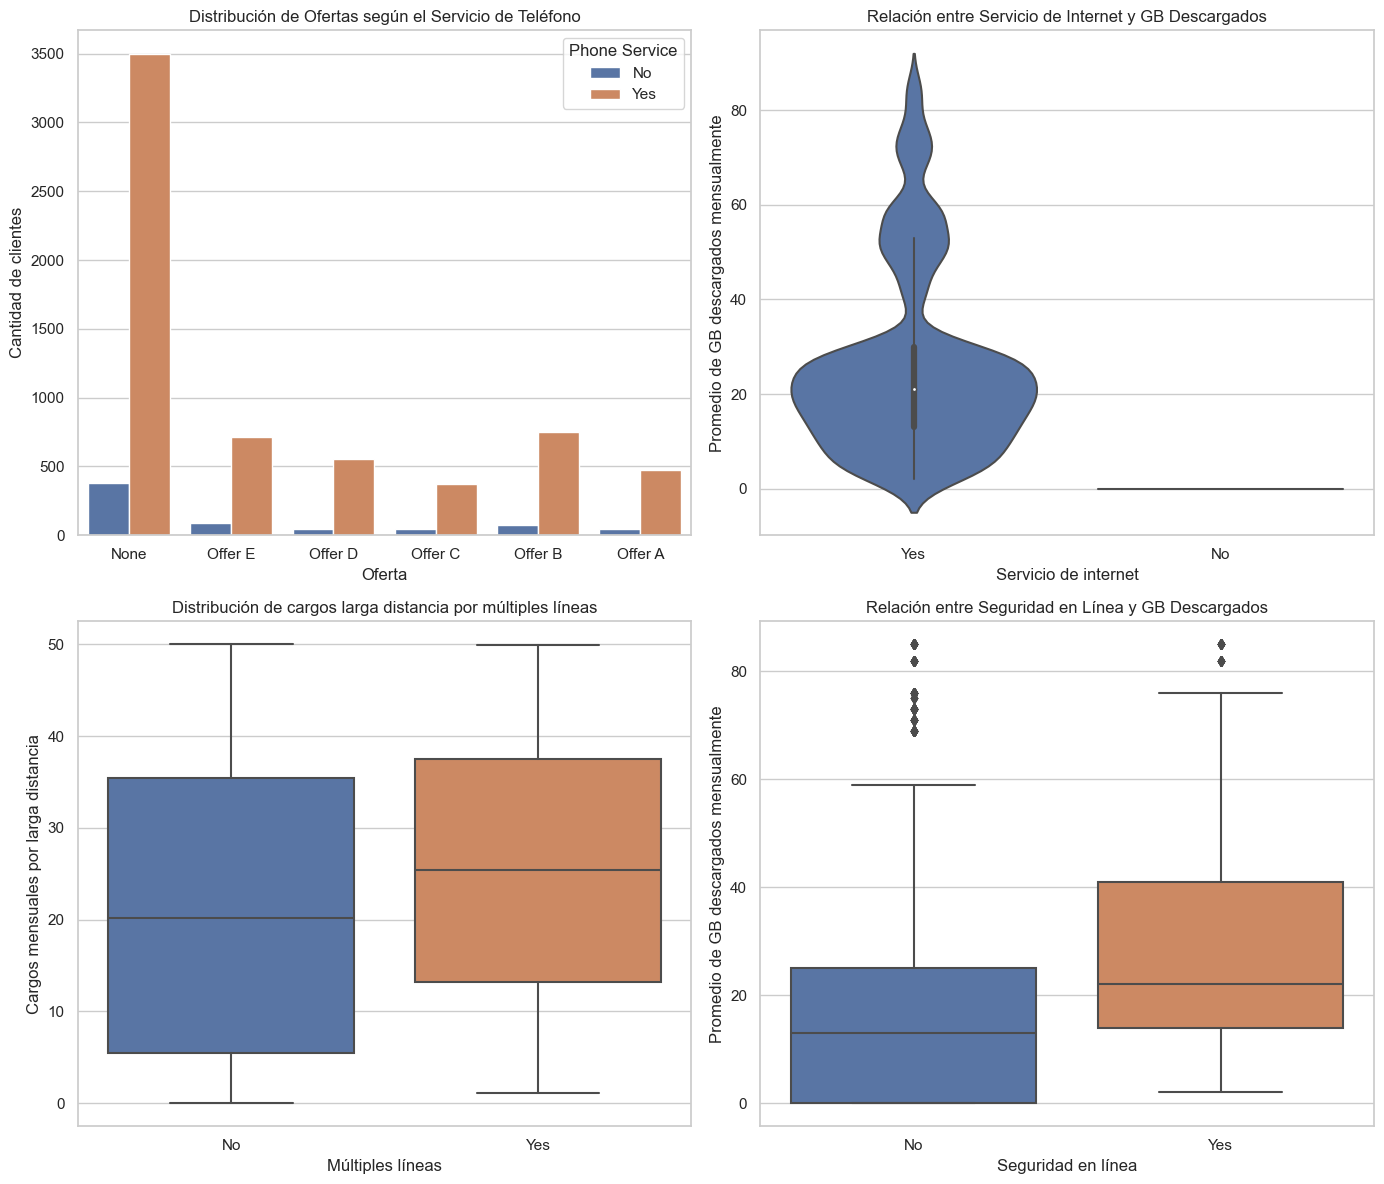

In [24]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# 1. Gráfico de barras para Offer y Phone Service
sns.countplot(ax=axes[0, 0], data=filtered_data, x='Offer', hue='Phone Service')
axes[0, 0].set_title('Distribución de Ofertas según el Servicio de Teléfono')
axes[0, 0].set_ylabel('Cantidad de clientes')
axes[0, 0].set_xlabel('Oferta')

# 2. Gráfico de violín para Internet Service y Avg Monthly GB Download
sns.violinplot(ax=axes[0, 1], data=filtered_data, x='Internet Service', y='Avg Monthly GB Download')
axes[0, 1].set_title('Relación entre Servicio de Internet y GB Descargados')
axes[0, 1].set_ylabel('Promedio de GB descargados mensualmente')
axes[0, 1].set_xlabel('Servicio de internet')

# 3. Gráfico de dispersión para Avg Monthly Long Distance Charges y Multiple Lines
sns.boxplot(ax=axes[1, 0], data=filtered_data, x='Multiple Lines', y='Avg Monthly Long Distance Charges')
axes[1, 0].set_title('Distribución de cargos larga distancia por múltiples líneas')
axes[1, 0].set_ylabel('Cargos mensuales por larga distancia')
axes[1, 0].set_xlabel('Múltiples líneas')

# 4. Gráfico de caja para Online Security y Avg Monthly GB Download
sns.boxplot(ax=axes[1, 1], data=filtered_data, x='Online Security', y='Avg Monthly GB Download')
axes[1, 1].set_title('Relación entre Seguridad en Línea y GB Descargados')
axes[1, 1].set_ylabel('Promedio de GB descargados mensualmente')
axes[1, 1].set_xlabel('Seguridad en línea')

plt.tight_layout()
plt.show()

In [25]:
# 1
# Distribución de Ofertas según el Servicio de Teléfono: 
# La mayoría de los clientes no tienen ninguna oferta activa ("None")
# para quienes tienen servicio de teléfono como para los que no lo tienen
# los clientes con servicio de teléfono son más en todas las categorías de oferta

In [26]:
# 2
# Relación entre el Servicio de Internet y los GB Descargados: 
# Los clientes con servicio de internet muestran una amplia distribución en la cantidad de GB descargados por mes
# la mediana está en 17 GB
# los que no tienen servicio de internet muestran valores cercanos a 0 GB

In [27]:
# 3
# Distribución de Cargos de Larga Distancia por Múltiples Líneas: 
# Los clientes con múltiples líneas suelen tener cargos de larga distancia un poco más altos 
# comparando con los que no tienen múltiples líneas
# los cargos están bien distribuidos en las categorías

In [28]:
# 4
# Relación entre Seguridad en Línea y GB Descargados: 
# Los clientes que no tienen seguridad en línea tienden a descargar más GB mensualmente en comparación con los que sí 
# los clientes que buscan mayor seguridad en línea no utilizan tanto la capacidad de internet